<a href="https://colab.research.google.com/github/DILSHAN565/FYP_DL_Models/blob/main/VGG16_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Install necessary libraries
!pip -q install vit_keras tensorflow-addons
!pip -q install --upgrade --no-cache-dir gdown
!pip install tensorflow-addons
!pip install vit-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.0 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [4]:
# Set the seed for reproducibility
SEED = 42
np.random.seed(SEED)

In [5]:
# Define dataset paths
train_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/train'
val_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/validation'
test_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/test'


In [6]:
# Define image size, batch size, and other constants
IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 100
LEARNING_RATE = 1e-4

In [7]:


# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.4],
    vertical_flip=True,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 725 images belonging to 8 classes.
Found 82 images belonging to 8 classes.
Found 83 images belonging to 8 classes.


In [8]:
# Define the model using VGG16
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg16_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [9]:
# Build the model
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

# Freeze the layers
for layer in model.layers:
    layer.trainable = False

In [10]:
# Add custom layers
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))  # Reduced number of units
model.add(Dense(units=512, activation='relu'))  # Reduced number of units
model.add(Dense(units=8, activation='softmax'))


In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=EPOCHS,
    verbose=2
)

Epoch 1/100
46/46 - 178s - loss: 1.5125 - accuracy: 0.4276 - val_loss: 1.0837 - val_accuracy: 0.6463 - 178s/epoch - 4s/step
Epoch 2/100
46/46 - 42s - loss: 1.2023 - accuracy: 0.5283 - val_loss: 0.9785 - val_accuracy: 0.6463 - 42s/epoch - 921ms/step
Epoch 3/100
46/46 - 44s - loss: 1.0545 - accuracy: 0.5945 - val_loss: 0.8838 - val_accuracy: 0.6585 - 44s/epoch - 951ms/step
Epoch 4/100
46/46 - 42s - loss: 0.9243 - accuracy: 0.6359 - val_loss: 0.8039 - val_accuracy: 0.7195 - 42s/epoch - 919ms/step
Epoch 5/100
46/46 - 41s - loss: 0.8599 - accuracy: 0.6703 - val_loss: 0.8741 - val_accuracy: 0.6341 - 41s/epoch - 901ms/step
Epoch 6/100
46/46 - 42s - loss: 0.8054 - accuracy: 0.6897 - val_loss: 0.9738 - val_accuracy: 0.6098 - 42s/epoch - 904ms/step
Epoch 7/100
46/46 - 42s - loss: 0.7671 - accuracy: 0.6910 - val_loss: 0.7743 - val_accuracy: 0.6951 - 42s/epoch - 920ms/step
Epoch 8/100
46/46 - 45s - loss: 0.7128 - accuracy: 0.7159 - val_loss: 0.7140 - val_accuracy: 0.7073 - 45s/epoch - 988ms/step
E

In [13]:
# Evaluate the model
test_labels = test_generator.classes
predictions = model.predict(test_generator, steps=len(test_generator), verbose=0)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))


In [14]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
# Plot classification report
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
    lines = cr.split('\n')
    classes = []
    plot_mat = []
    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plot_mat.append(v)

    if with_avg_total:
        ave_total = lines[len(lines) - 1].split()
        classes.append('avg/total')
        v_ave_total = [float(x) for x in ave_total[1: len(ave_total) - 1]]
        plot_mat.append(v_ave_total)

    plt.imshow(plot_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)

    thresh = np.max(plot_mat) / 2.
    for i, j in itertools.product(range(len(plot_mat)), range(len(plot_mat[0]))):
        plt.text(j, i, format(plot_mat[i][j], '.2f'), horizontalalignment="center",
                 color="white" if plot_mat[i][j] > thresh else "black")

    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.tight_layout()

# Print and plot classification report
print('Classification Report')
cr = classification_report(test_labels, predictions.argmax(axis=1), target_names=[str(i) for i in range(8)])
print(cr)

plot_classification_report(cr, title='Classification Report', with_avg_total=True)
plt.show()

# Plot and print confusion matrix
plot_confusion_matrix(cm, classes=[str(i) for i in range(8)], title='Confusion Matrix')
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.71      0.50      0.59        10
           2       0.64      0.64      0.64        11
           3       0.90      0.90      0.90        10
           4       0.71      1.00      0.83        10
           5       1.00      1.00      1.00         8
           6       1.00      0.92      0.96        12
           7       0.67      0.83      0.74        12

    accuracy                           0.80        83
   macro avg       0.81      0.80      0.80        83
weighted avg       0.81      0.80      0.79        83



IndexError: list index out of range

Confusion matrix, without normalization
[[ 6  0  0  0  0  0  0  4]
 [ 0  5  4  0  1  0  0  0]
 [ 0  1  7  0  3  0  0  0]
 [ 0  0  0  9  0  0  0  1]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0 11  0]
 [ 1  0  0  1  0  0  0 10]]


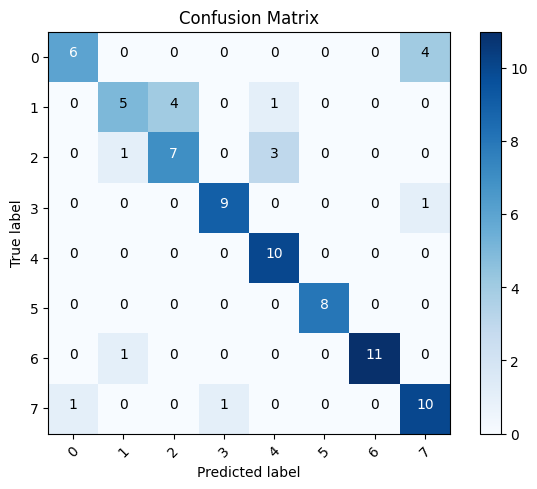

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage
test_labels = test_generator.classes
predictions = model.predict(test_generator, steps=len(test_generator), verbose=0)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

plot_confusion_matrix(cm, classes=[str(i) for i in range(8)], title='Confusion Matrix')
plt.show()
